In [38]:
import json
data = json.load(open("saved-ratings.json"))

# For each class, calculate a score for the professor

cleaned = {}
for name, info in data.items():
    for rating in info["ratings"]:
        review = rating["rating"]
        class_ = rating["class_name"]
        if class_ not in cleaned:
            cleaned[class_] = {}
        if name not in cleaned[class_]:
            cleaned[class_][name] = []
        cleaned[class_][name].append(review)

# Create dataframe of classname,professorname,avg,amount
import pandas as pd
final_dataset = []

for class_, profs in cleaned.items():
    for prof in profs:
        score = sum(profs[prof]) / len(profs[prof])
        num_reviews = len(profs[prof])
        final_dataset.append({"class": class_, "professor": prof, "avg": score, "num_reviews": num_reviews})

df = pd.DataFrame(final_dataset)

print(df.head())

# Only include CS classes
df = df[df["class"].str.startswith("CS")]

# exclude classes that aren't 5 chars long
df = df[df["class"].str.len() == 5]

   class        professor       avg  num_reviews
0  CS173   Margaret Fleck  4.285714           42
1  CS173   Payam Delgosha  1.000000            1
2  CS173  Benjamin Cosman  2.096774           31
3  CS173     Graham Evans  1.000000            1
4  CS173    Jeff Erickson  4.500000            2


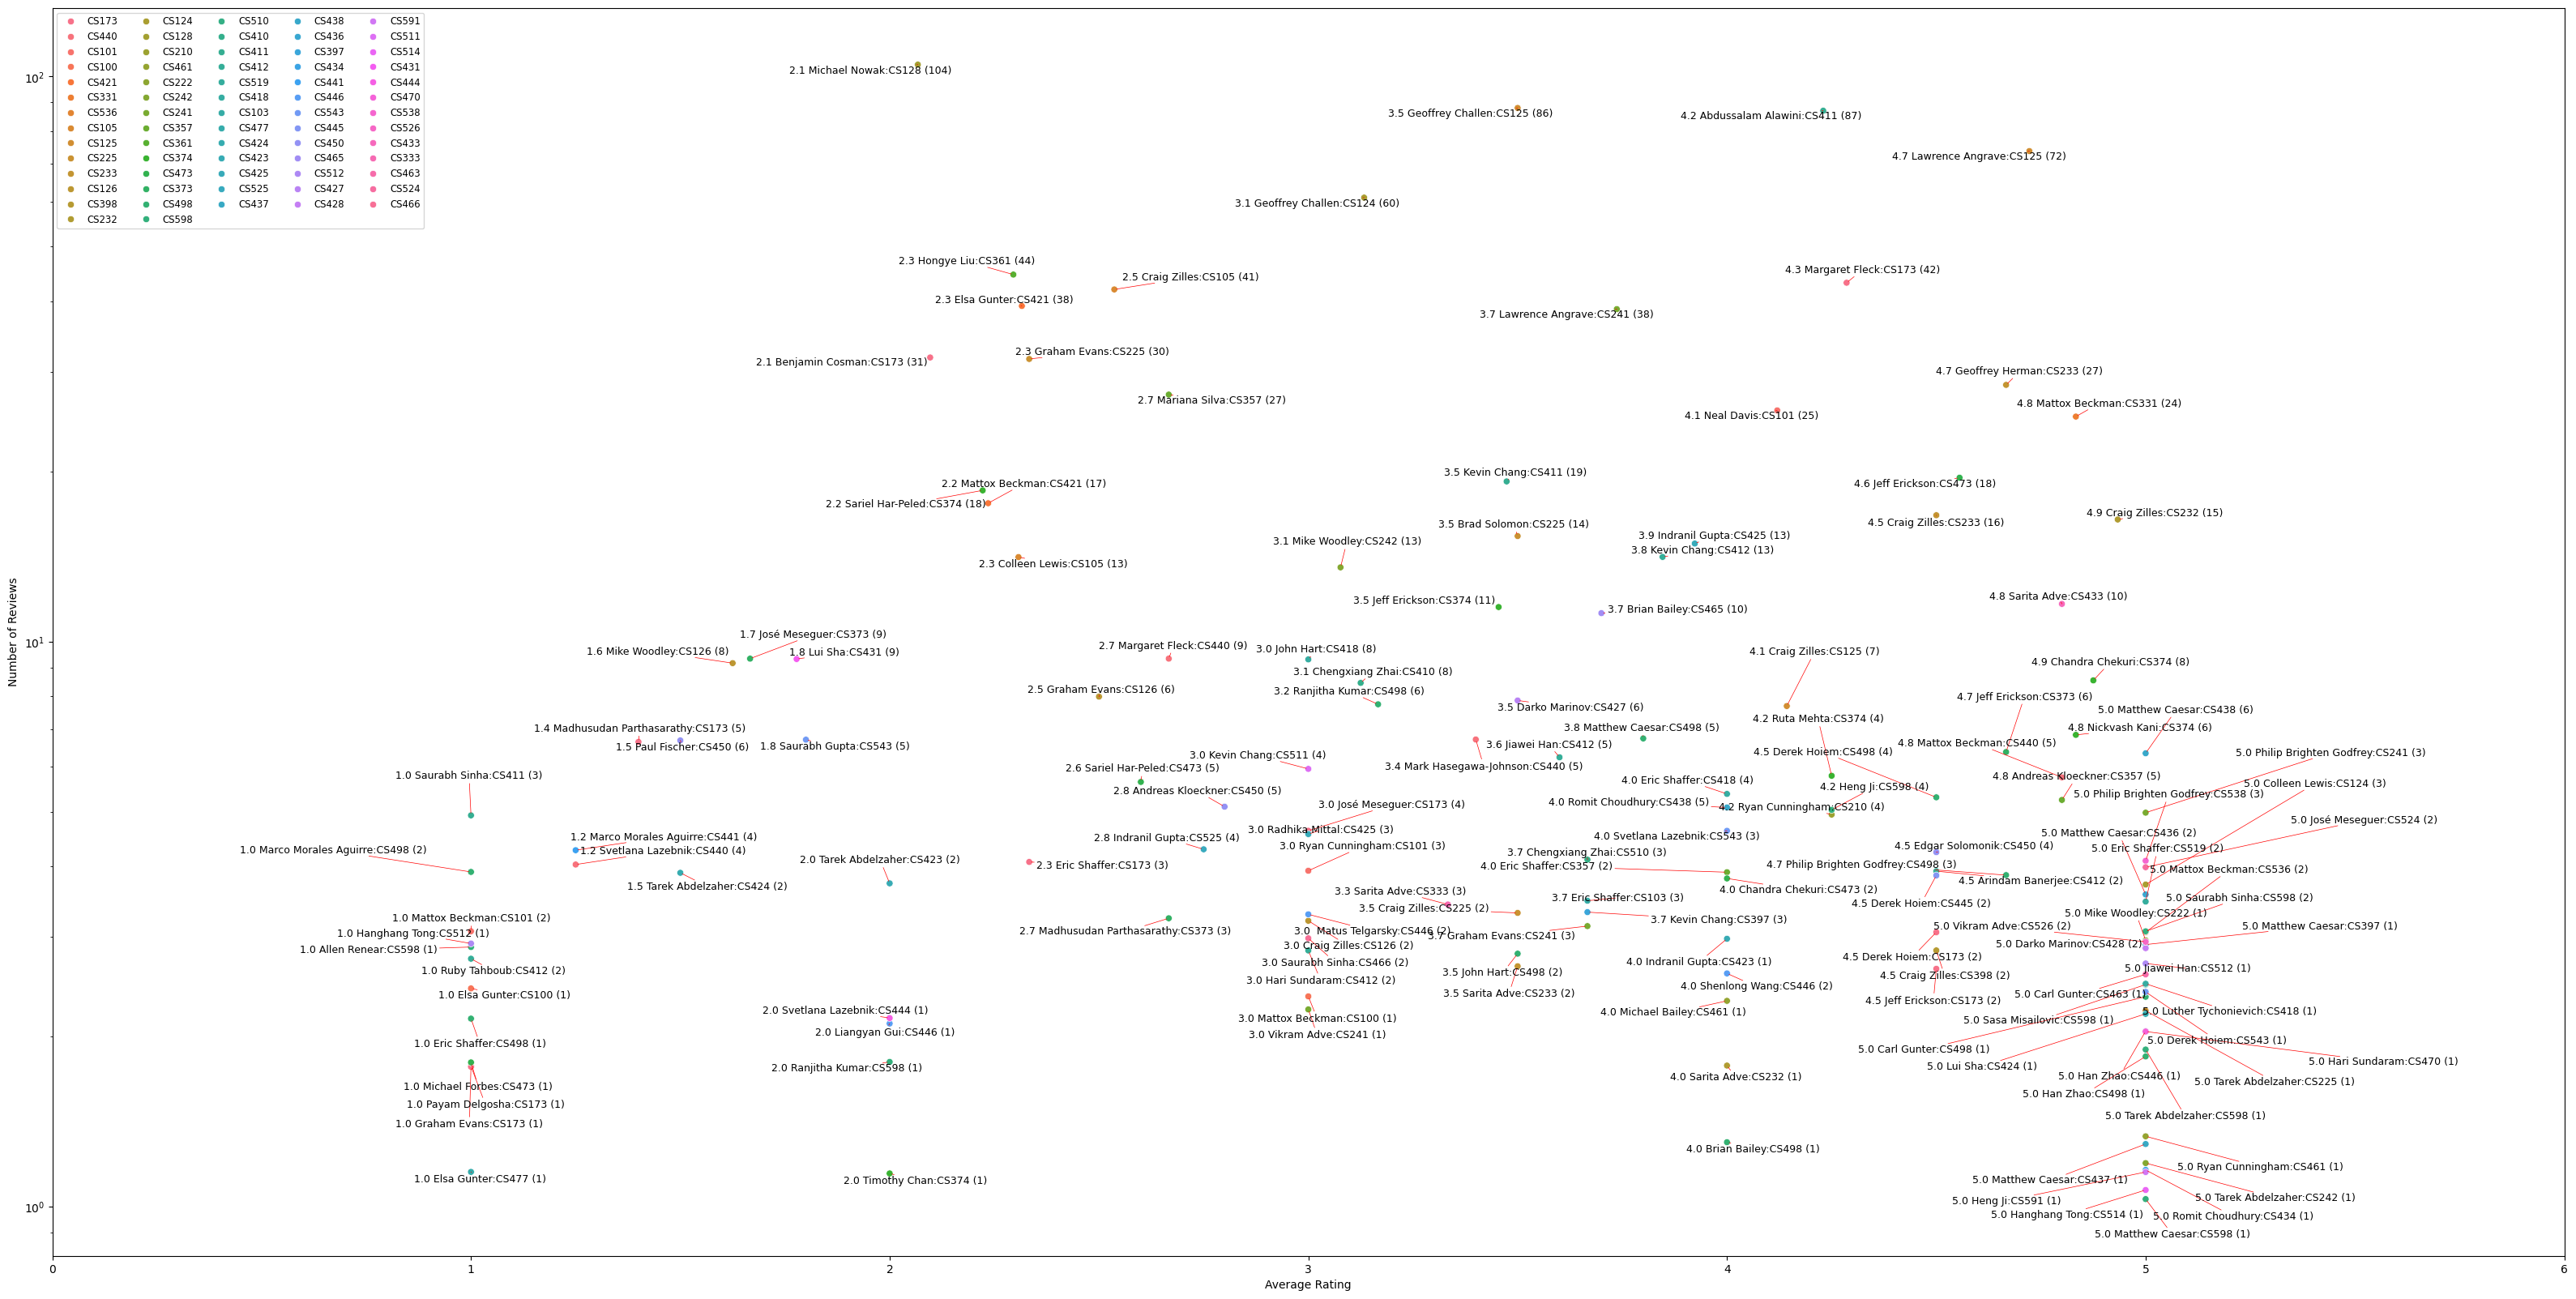

In [40]:
# Plot avg vs num_reviews, with a different color per class, and a label of professor+class
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import numpy as np

# add a random offset to row["num_reviews"]
# +np.random.random()*2
df["num_reviews_adjust"] = df["num_reviews"].apply(lambda x: x + np.random.random()*2)


# Increase plot size
plt.figure(figsize=(40, 20))
plt.yscale('log')
plt.xlim(0, 6)
sns.scatterplot(x="avg", y="num_reviews_adjust", hue="class", data=df)
# Add a label of professor name for each point
texts = [
    plt.text(row["avg"], row["num_reviews_adjust"], f'{round(row["avg"],1)} {row["professor"]}:{row["class"]} ({row["num_reviews"]})', size=9, ha='center', va='center')
    for i, row in df.iterrows()
]
adjust_text(texts, force_text=(0.5, 0.5), arrowprops=dict(arrowstyle='-', color='red', lw=0.5))

# for i, row in df.iterrows():
#     plt.text(row["avg"], row["num_reviews"], f'{row["professor"]} - {row["class"]}')
# split legend up into sublegends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', ncol=5, fontsize='small')

# Extend x axis to fit data easier


plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [18]:
!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
